<a href="https://colab.research.google.com/github/viniciusbeckerdesouza/jupyters/blob/main/mestrado_ppginfos_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install tabula-py

     |████████████████████████████████| 11.7MB 251kB/s 


In [6]:
import tabula as tb

**Passo 1:**

Importar os dados do pdf e tranformar em um dataframe

In [7]:
tabela = tb.read_pdf("https://ppginfos.paginas.ufsc.br/files/2021/06/Resultado_PPGINFOS.pdf")

'pages' argument isn't specified.Will extract only from page 1 by default.


In [8]:
tabela[0]

,No. Inscrição,Nota Média,Nota média,Nota média.1,Média,Unnamed: 0
0,NaN,NaN,NaN,NaN,NaN,Resultado
1,do Candidato,do Currículo,do Projeto,da arguição,final,NaN
2,20210007278,"9,0","9,1","9,8","9,3",Aprovado
3,20210007332,10,"7,9","9,1","8,9",Aprovado
4,20210007365,"8,0","7,1","8,3","7,7",Aprovado
5,20210007410,"8,5","7,3","8,0","7,8",Aprovado
6,20210007458,"8,8","7,0",Não,NaN,Reprovado
7,NaN,NaN,NaN,compareceu,NaN,NaN
8,20210007659,"8,5","7,0","8,3","7,8",Aprovado
9,20210007701,"7,0","8,7","8,5","8,2",Aprovado


In [9]:
df = pd.DataFrame(tabela[0])

**Passo 2:**

Limpar os dados e preparar o dataframe para análise.

In [10]:
df = df.dropna()

In [11]:
df.head()

,No. Inscrição,Nota Média,Nota média,Nota média.1,Média,Unnamed: 0
2,20210007278,"9,0","9,1","9,8","9,3",Aprovado
3,20210007332,10,"7,9","9,1","8,9",Aprovado
4,20210007365,"8,0","7,1","8,3","7,7",Aprovado
5,20210007410,"8,5","7,3","8,0","7,8",Aprovado
8,20210007659,"8,5","7,0","8,3","7,8",Aprovado


In [12]:
df.columns = ['inscr','curriculo','projeto','arguicao','media','status']

In [13]:
df['arguicao'] = df['arguicao'].str.replace(',','.')
df['curriculo'] = df['curriculo'].str.replace(',','.')
df['media'] = df['media'].str.replace(',','.')
df['projeto'] = df['projeto'].str.replace(',','.')

In [14]:
df['arguicao'] = df['arguicao'].astype(float)
df['curriculo'] = df['curriculo'].astype(float)
df['media'] = df['media'].astype(float)
df['projeto'] = df['projeto'].astype(float)

In [15]:
df = df.drop(columns=['inscr','status'])

In [16]:
df.sort_values('curriculo')

,curriculo,projeto,arguicao,media
9,7.0,8.7,8.5,8.2
23,7.0,7.0,9.1,7.6
18,7.0,7.2,8.6,7.6
24,7.5,8.6,9.0,8.4
4,8.0,7.1,8.3,7.7
10,8.0,8.1,8.5,8.2
11,8.0,7.0,8.8,7.8
14,8.0,7.0,8.3,7.7
5,8.5,7.3,8.0,7.8
8,8.5,7.0,8.3,7.8


**Passo 3:**

Análise exploratória de dados

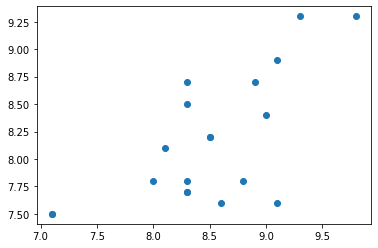

In [17]:
plt.scatter(df['arguicao'], df['media'])

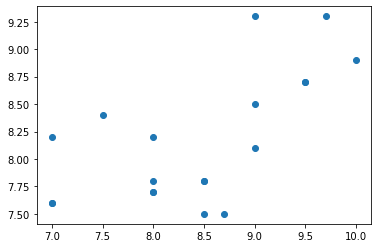

In [18]:
plt.scatter(df['curriculo'], df['media'])

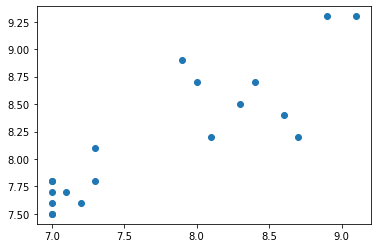

In [19]:
plt.scatter(df['projeto'], df['media'])

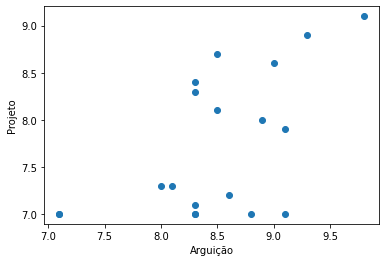

In [20]:
plt.scatter(df['arguicao'], df['projeto'])
plt.xlabel('Arguição')
plt.ylabel('Projeto')
plt.show()

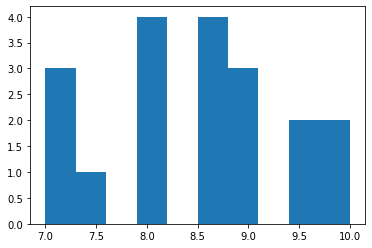

In [21]:
plt.hist(df['curriculo'], bins=10)
plt.show()

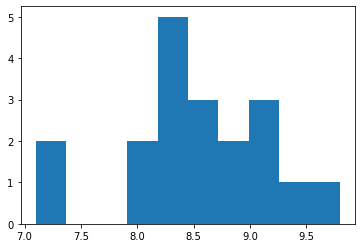

In [22]:
plt.hist(df['arguicao'], bins=10)
plt.show()

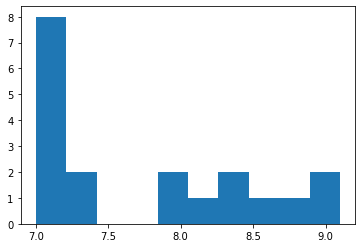

In [23]:
plt.hist(df['projeto'], bins=10)
plt.show()

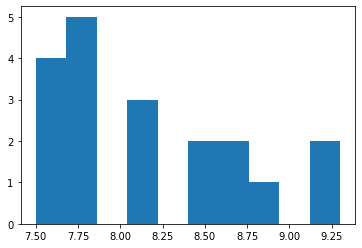

In [24]:
plt.hist(df['media'], bins=10)
plt.show()

In [25]:
df.describe()

,curriculo,projeto,arguicao,media
count,19.000000,19.000000,19.000000,19.000000
mean,8.442105,7.731579,8.494737,8.173684
std,0.917918,0.752811,0.670384,0.587690
min,7.000000,7.000000,7.100000,7.500000
25%,8.000000,7.000000,8.300000,7.700000
50%,8.500000,7.300000,8.500000,8.100000
75%,9.000000,8.350000,8.950000,8.600000
max,10.000000,9.100000,9.800000,9.300000


<function matplotlib.pyplot.show>

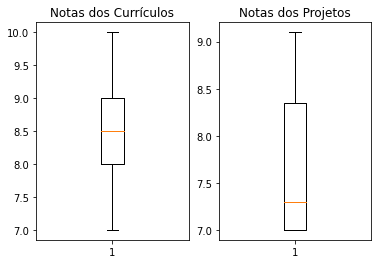

In [26]:
plt.subplot(1,2,1)
plt.boxplot(df['curriculo'])
plt.title("Notas dos Currículos")
plt.subplot(1,2,2)
plt.boxplot(df['projeto'])
plt.title("Notas dos Projetos")
plt.show

<function matplotlib.pyplot.show>

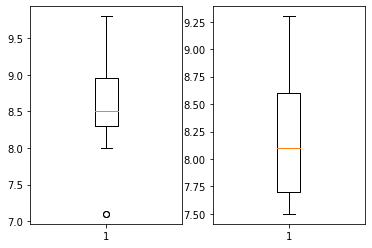

In [27]:
plt.subplot(1,2,1)
plt.boxplot(df['arguicao'])
plt.subplot(1,2,2)
plt.boxplot(df['media'])
plt.show

<function matplotlib.pyplot.show>

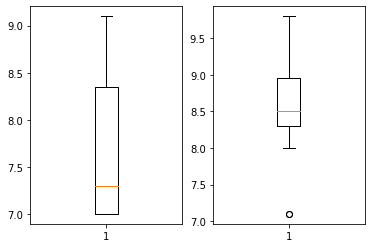

In [28]:
plt.subplot(1,2,1)
plt.boxplot(df['projeto'])
plt.subplot(1,2,2)
plt.boxplot(df['arguicao'])
plt.show

As notas de projeto tendem para baixo e as notas de arguição para cima.

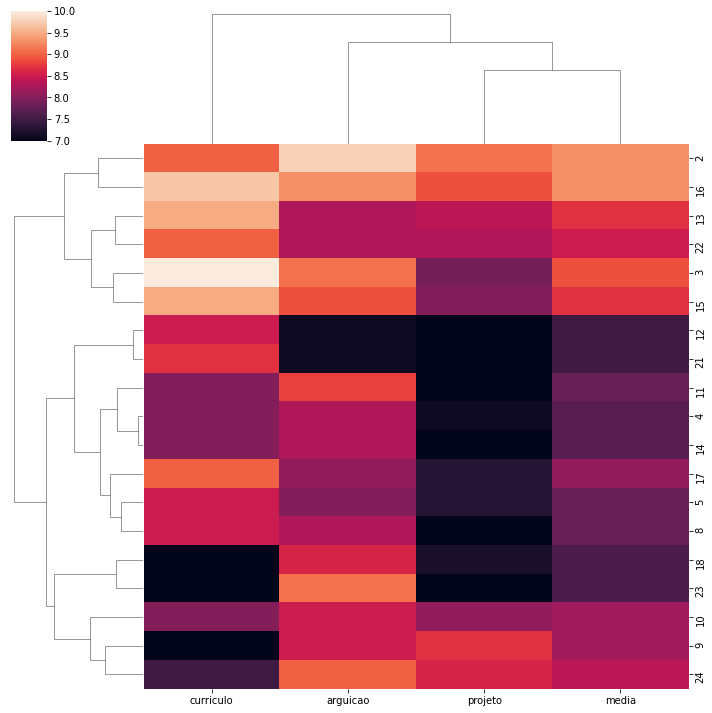

In [39]:
sns.clustermap(data=df)
plt.savefig("mapa-calor.png", format="png")
plt.show()

Temos 3 clusters importantes:

1. Os que foram bem em todos os quesitos.
2. Os que foram mal na análise de currículo.
3. Os que foram mal no projeto.

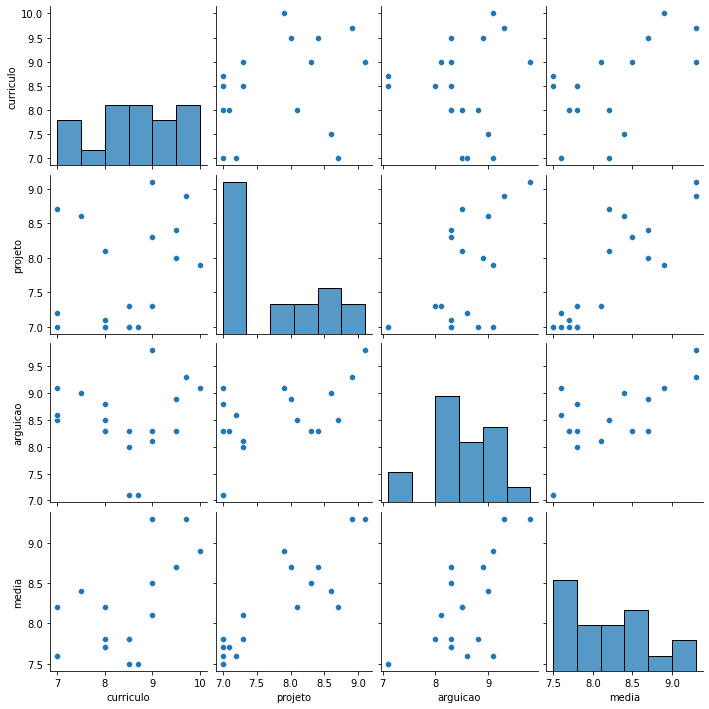

In [30]:
sns.pairplot(data=df)
plt.show()

Parece que existe uma correlação positiva entre as notas.

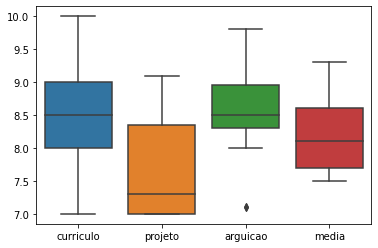

In [31]:
sns.boxplot(data=df)
plt.show()

Colocando os boxplots lado a lado fica clara a discrepância das notas de projeto.

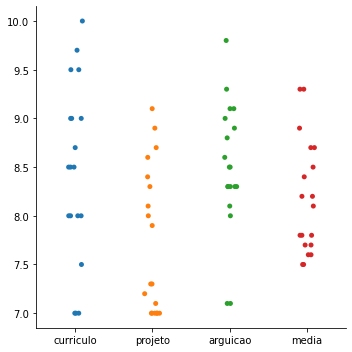

In [32]:
sns.catplot(data=df)
plt.show()

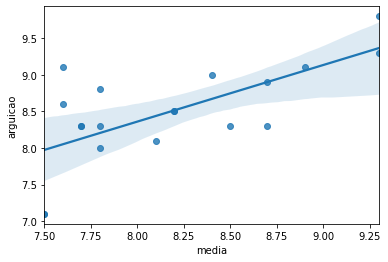

In [33]:
sns.regplot(data=df,x='media',y='arguicao')
plt.show()

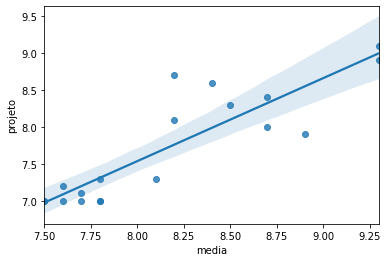

In [34]:
sns.regplot(data=df,x='media',y='projeto')
plt.show()

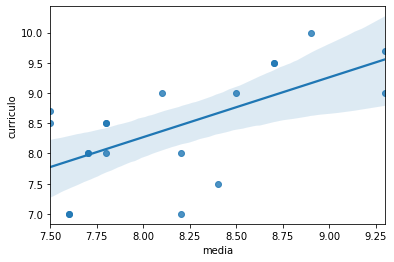

In [35]:
sns.regplot(data=df,x='media',y='curriculo')
plt.show()

Os gráficos de regressão deixam claro a correlação positiva entre as notas. 

Se você tira uma nota alta em um dos quesitos, sua média também vai ser alta - e se você tira uma nota baixa, sua média vai ser mais baixa.

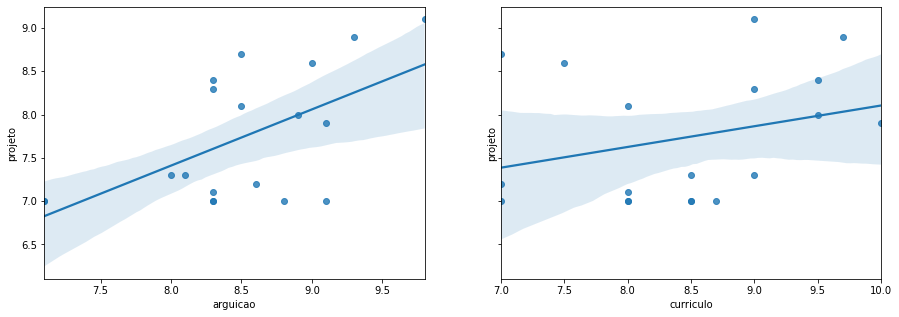

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.regplot(ax=axes[0], data=df, x='arguicao', y='projeto')
sns.regplot(ax=axes[1], data=df, x='curriculo', y='projeto')
plt.show()  

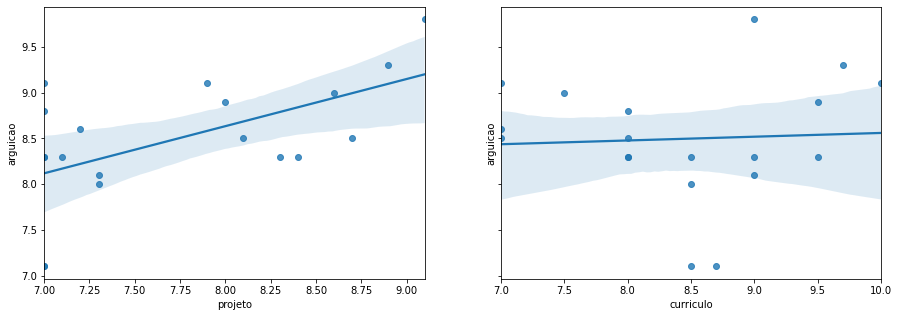

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.regplot(ax=axes[0], data=df, x='projeto', y='arguicao')
sns.regplot(ax=axes[1], data=df, x='curriculo', y='arguicao')
plt.show()

Quanto melhor o projeto melhor a arguição.

Currículo e arguição não estão tão correlacionados.

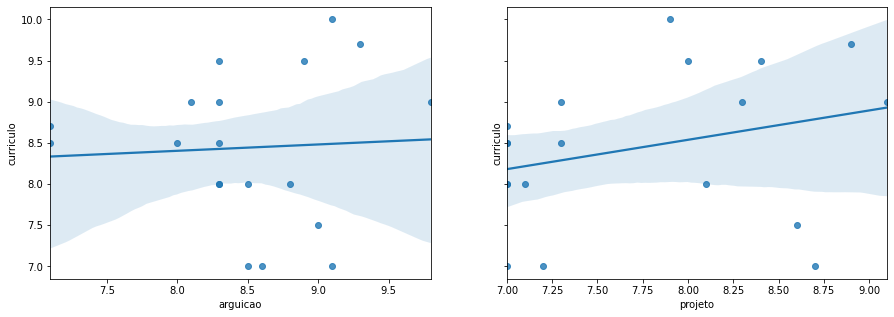

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.regplot(ax=axes[0], data=df, x='arguicao', y='curriculo')
sns.regplot(ax=axes[1], data=df, y='curriculo', x='projeto')
plt.show()